In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
X_train = X_train.reshape(X_train.shape[0],1,28,28)
X_test = X_test.reshape(X_test.shape[0],1,28,28)

Label:  5


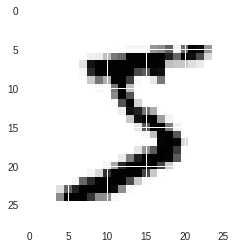

In [24]:
plt.imshow(X_train[0].squeeze())
print('Label: ',y_train[0])

In [0]:
from keras.utils import np_utils

## Normalising the Inputs

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


In [0]:
from keras.models import Sequential
import keras.layers as L
import keras

In [0]:
num_classes = y_train.shape[1]

## Building our CNN model 
In the following model we have used dropout, adam optimisation and one Conv2D layer.

In [0]:
model = Sequential()
model.add(L.Conv2D(32,(3,3),padding = 'valid', input_shape=(1,28,28),data_format='channels_first',activation = 'relu'))
model.add(L.MaxPooling2D(pool_size=(2,2)))
model.add(L.Dropout(0.2))
model.add(L.Flatten())
model.add(L.Dense(128,activation = 'relu'))
model.add(L.Dropout(0.3))
model.add(L.Dense(num_classes, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

## Fitting our model

In [38]:
model.fit(X_train,y_train, batch_size = 128, epochs = 25,validation_data=(X_test,y_test),verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 6s 108us/step - loss: 0.2768 - acc: 0.9173 - val_loss: 0.0844 - val_acc: 0.9738
Epoch 2/25
60000/60000 [==============================] - 5s 90us/step - loss: 0.0970 - acc: 0.9713 - val_loss: 0.0577 - val_acc: 0.9807
Epoch 3/25
60000/60000 [==============================] - 5s 89us/step - loss: 0.0696 - acc: 0.9792 - val_loss: 0.0460 - val_acc: 0.9840
Epoch 4/25
60000/60000 [==============================] - 5s 89us/step - loss: 0.0557 - acc: 0.9826 - val_loss: 0.0456 - val_acc: 0.9847
Epoch 5/25
60000/60000 [==============================] - 5s 89us/step - loss: 0.0473 - acc: 0.9850 - val_loss: 0.0425 - val_acc: 0.9857
Epoch 6/25
60000/60000 [==============================] - 5s 89us/step - loss: 0.0399 - acc: 0.9871 - val_loss: 0.0374 - val_acc: 0.9871
Epoch 7/25
60000/60000 [==============================] - 5s 88us/step - loss: 0.0351 - acc: 0.9884 - val_loss: 0.0368 - val_ac

## Evaluating Our Model over Test Data

In [39]:
scores = model.evaluate(X_test,y_test, verbose=1)

10000/10000 [==============================] - 1s 78us/step


## Checking our Scores

In [40]:
print ("Test Loss: ",scores[0],"\n","Test Accuracy: ",scores[1]*100, "%")

Test Loss:  0.044726619361301984 
 Test Accuracy:  98.9 %
